# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Install Other Requirements

In [2]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('data/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('data/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('data/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('data/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('data/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
# Display initial information about each DataFrame
info_hh_income = df_hh_income.info()
info_pct_poverty = df_pct_poverty.info()
info_pct_completed_hs = df_pct_completed_hs.info()
info_share_race_city = df_share_race_city.info()
info_fatalities = df_fatalities.info()

# Check for NaN values and duplicates
nan_hh_income = df_hh_income.isnull().sum()
nan_pct_poverty = df_pct_poverty.isnull().sum()
nan_pct_completed_hs = df_pct_completed_hs.isnull().sum()
nan_share_race_city = df_share_race_city.isnull().sum()
nan_fatalities = df_fatalities.isnull().sum()

duplicates_hh_income = df_hh_income.duplicated().sum()
duplicates_pct_poverty = df_pct_poverty.duplicated().sum()
duplicates_pct_completed_hs = df_pct_completed_hs.duplicated().sum()
duplicates_share_race_city = df_share_race_city.duplicated().sum()
duplicates_fatalities = df_fatalities.duplicated().sum()

(
    info_hh_income,
    nan_hh_income,
    duplicates_hh_income,
    info_pct_poverty,
    nan_pct_poverty,
    duplicates_pct_poverty,
    info_pct_completed_hs,
    nan_pct_completed_hs,
    duplicates_pct_completed_hs,
    info_share_race_city,
    nan_share_race_city,
    duplicates_share_race_city,
    info_fatalities,
    nan_fatalities,
    duplicates_fatalities,
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null 

(None,
 Geographic Area     0
 City                0
 Median Income      51
 dtype: int64,
 0,
 None,
 Geographic Area    0
 City               0
 poverty_rate       0
 dtype: int64,
 0,
 None,
 Geographic Area         0
 City                    0
 percent_completed_hs    0
 dtype: int64,
 0,
 None,
 Geographic area          0
 City                     0
 share_white              0
 share_black              0
 share_native_american    0
 share_asian              0
 share_hispanic           0
 dtype: int64,
 0,
 None,
 id                           0
 name                         0
 date                         0
 manner_of_death              0
 armed                        9
 age                         77
 gender                       0
 race                       195
 city                         0
 state                        0
 signs_of_mental_illness      0
 threat_level                 0
 flee                        65
 body_camera                  0
 dtype: int64,
 0)

#### 1. Median Household Income 2015 (`df_hh_income`)
- **Shape:** (29322, 3)
- **Columns:** `Geographic Area`, `City`, `Median Income`
- **NaN Values:** 51 in `Median Income`
- **Duplicates:** 0

#### 2. Percentage of People Below Poverty Level (`df_pct_poverty`)
- **Shape:** (29329, 3)
- **Columns:** `Geographic Area`, `City`, `poverty_rate`
- **NaN Values:** 0
- **Duplicates:** 0

#### 3. Percentage of People Over 25 Completed High School (`df_pct_completed_hs`)
- **Shape:** (29329, 3)
- **Columns:** `Geographic Area`, `City`, `percent_completed_hs`
- **NaN Values:** 0
- **Duplicates:** 0

#### 4. Share of Race By City (`df_share_race_city`)
- **Shape:** (29268, 7)
- **Columns:** `Geographic area`, `City`, `share_white`, `share_black`, `share_native_american`, `share_asian`, `share_hispanic`
- **NaN Values:** 0
- **Duplicates:** 0

#### 5. Fatalities by Police in the US (`df_fatalities`)
- **Shape:** (2535, 14)
- **Columns:** `id`, `name`, `date`, `manner_of_death`, `armed`, `age`, `gender`, `race`, `city`, `state`, `signs_of_mental_illness`, `threat_level`, `flee`, `body_camera`
- **NaN Values:** 9 in `armed`, 77 in `age`, 195 in `race`, 65 in `flee`
- **Duplicates:** 0

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [7]:
# Data Cleaning: Handle NaN values

# Replace NaN values with 0 in `Median Income` in df_hh_income
df_hh_income['Median Income'] = df_hh_income['Median Income'].replace(np.nan, 0)

# Replace NaN values with 0 in columns with NaN in df_fatalities
df_fatalities['armed'] = df_fatalities['armed'].replace(np.nan, 'Unknown')
df_fatalities['age'] = df_fatalities['age'].replace(np.nan, 0)
df_fatalities['race'] = df_fatalities['race'].replace(np.nan, 'Unknown')
df_fatalities['flee'] = df_fatalities['flee'].replace(np.nan, 'Not fleeing')

# Verify the changes
nan_hh_income_after = df_hh_income.isnull().sum()
nan_fatalities_after = df_fatalities.isnull().sum()

nan_hh_income_after, nan_fatalities_after

(Geographic Area    0
 City               0
 Median Income      0
 dtype: int64,
 id                         0
 name                       0
 date                       0
 manner_of_death            0
 armed                      0
 age                        0
 gender                     0
 race                       0
 city                       0
 state                      0
 signs_of_mental_illness    0
 threat_level               0
 flee                       0
 body_camera                0
 dtype: int64)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [8]:
# Convert poverty_rate to numeric, coercing errors
df_pct_poverty['poverty_rate'] = pd.to_numeric(
    df_pct_poverty['poverty_rate'], errors='coerce'
)

# Group by Geographic Area to find the average poverty rate per state
df_poverty_by_state = (
    df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
)

# Sort by poverty_rate
df_poverty_by_state = df_poverty_by_state.sort_values(
    by='poverty_rate', ascending=False
)

df_poverty_by_state

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


C:\Users\brian\AppData\Local\Temp\ipykernel_23652\4188095841.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


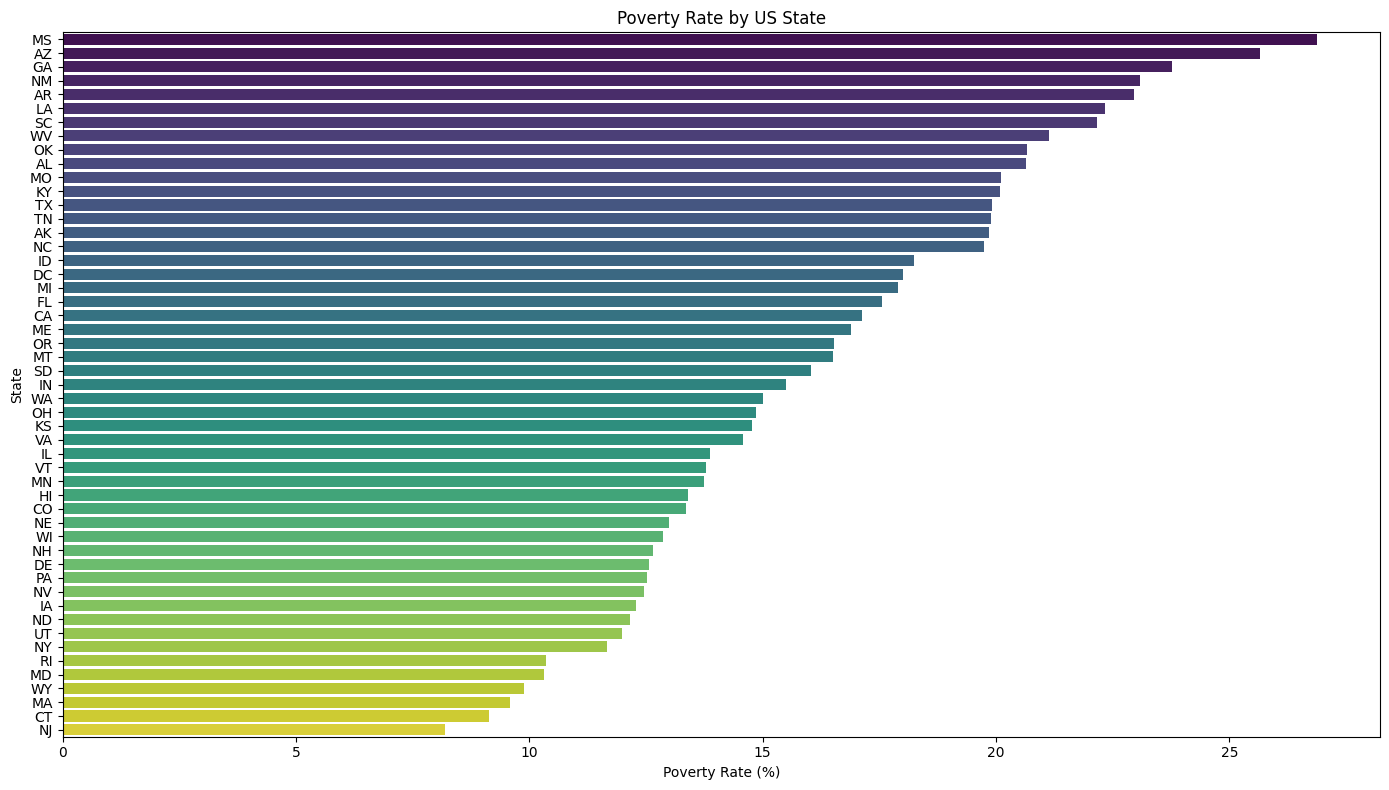

In [9]:
# Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='poverty_rate', y='Geographic Area', data=df_poverty_by_state, palette='viridis'
)
plt.title('Poverty Rate by US State')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('State')
plt.tight_layout()

plt.show()

In [10]:
# Determine the states with highest and lowest poverty rates
highest_poverty_state = df_poverty_by_state.iloc[0]
lowest_poverty_state = df_poverty_by_state.iloc[-1]

highest_poverty_state, lowest_poverty_state

(Geographic Area      MS
 poverty_rate      26.88
 Name: 25, dtype: object,
 Geographic Area     NJ
 poverty_rate      8.19
 Name: 31, dtype: object)

### Bar Chart: Poverty Rate by US State

The bar chart above shows the poverty rates ranked from highest to lowest by US state.

- **State with the Highest Poverty Rate:** Mississippi (26.88%)
- **State with the Lowest Poverty Rate:** New Jersey (8.19%)

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [11]:
# Convert percent_completed_hs to numeric, coercing errors
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

# Group by Geographic Area to find the average high school graduation rate per state
df_hs_grad_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

# Sort by percent_completed_hs
df_hs_grad_by_state = df_hs_grad_by_state.sort_values(by='percent_completed_hs')
df_hs_grad_by_state

,Geographic Area,percent_completed_hs
43,TX,75.69
25,MS,78.47
10,GA,79.01
18,LA,79.29
2,AR,79.95
1,AL,80.30
3,AZ,80.47
40,SC,80.85
32,NM,80.98
42,TN,81.63


C:\Users\brian\AppData\Local\Temp\ipykernel_23652\3029480814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='percent_completed_hs', y='Geographic Area', data=df_hs_grad_by_state, palette='magma')


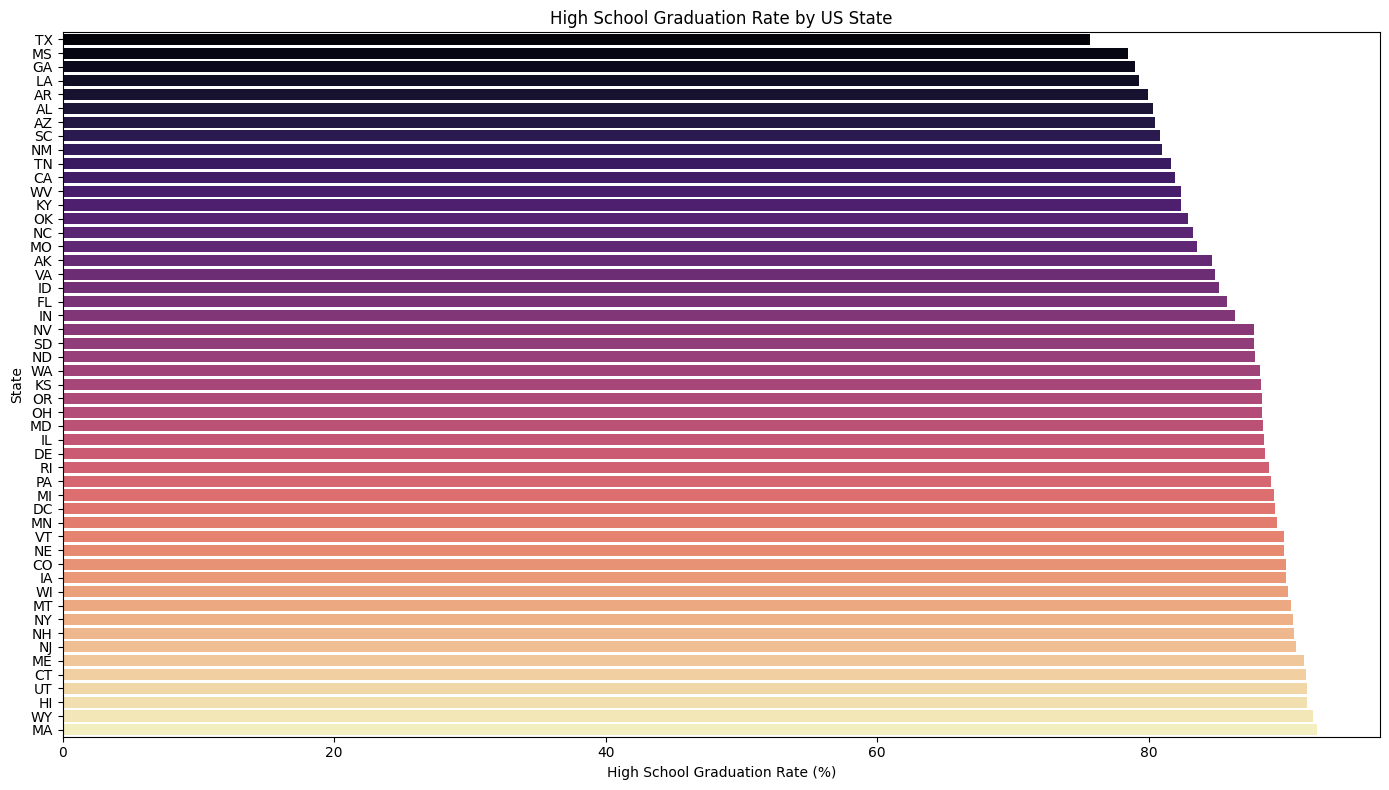

In [12]:
# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='percent_completed_hs', y='Geographic Area', data=df_hs_grad_by_state, palette='magma')
plt.title('High School Graduation Rate by US State')
plt.xlabel('High School Graduation Rate (%)')
plt.ylabel('State')
plt.tight_layout()

plt.show()

In [13]:
# Determine the states with highest and lowest high school graduation rates
lowest_hs_grad_state = df_hs_grad_by_state.iloc[0]
highest_hs_grad_state = df_hs_grad_by_state.iloc[-1]

lowest_hs_grad_state, highest_hs_grad_state

(Geographic Area           TX
 percent_completed_hs   75.69
 Name: 43, dtype: object,
 Geographic Area           MA
 percent_completed_hs   92.40
 Name: 19, dtype: object)

### Bar Chart: High School Graduation Rate by US State

The bar chart above shows the high school graduation rates in ascending order by US state.

- **State with the Lowest High School Graduation Rate:** Texas (75.69%)
- **State with the Highest High School Graduation Rate:** Massachusetts (92.40%)

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [14]:
# Merge df_pct_poverty and df_pct_completed_hs on Geographic Area and City
df_poverty_hs = pd.merge(
    df_pct_poverty, df_pct_completed_hs, on=['Geographic Area', 'City']
)

# Group by Geographic Area to find the average poverty rate and high school graduation rate per state
df_poverty_hs_by_state = (
    df_poverty_hs.groupby('Geographic Area')[['poverty_rate', 'percent_completed_hs']]
    .mean()
    .reset_index()
)

# Sort by Geographic Area for plotting
df_poverty_hs_by_state = df_poverty_hs_by_state.sort_values(by='Geographic Area')
df_poverty_by_state

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


C:\Users\brian\AppData\Local\Temp\ipykernel_23652\3743967765.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_poverty_hs_by_state['Geographic Area'], rotation=90)


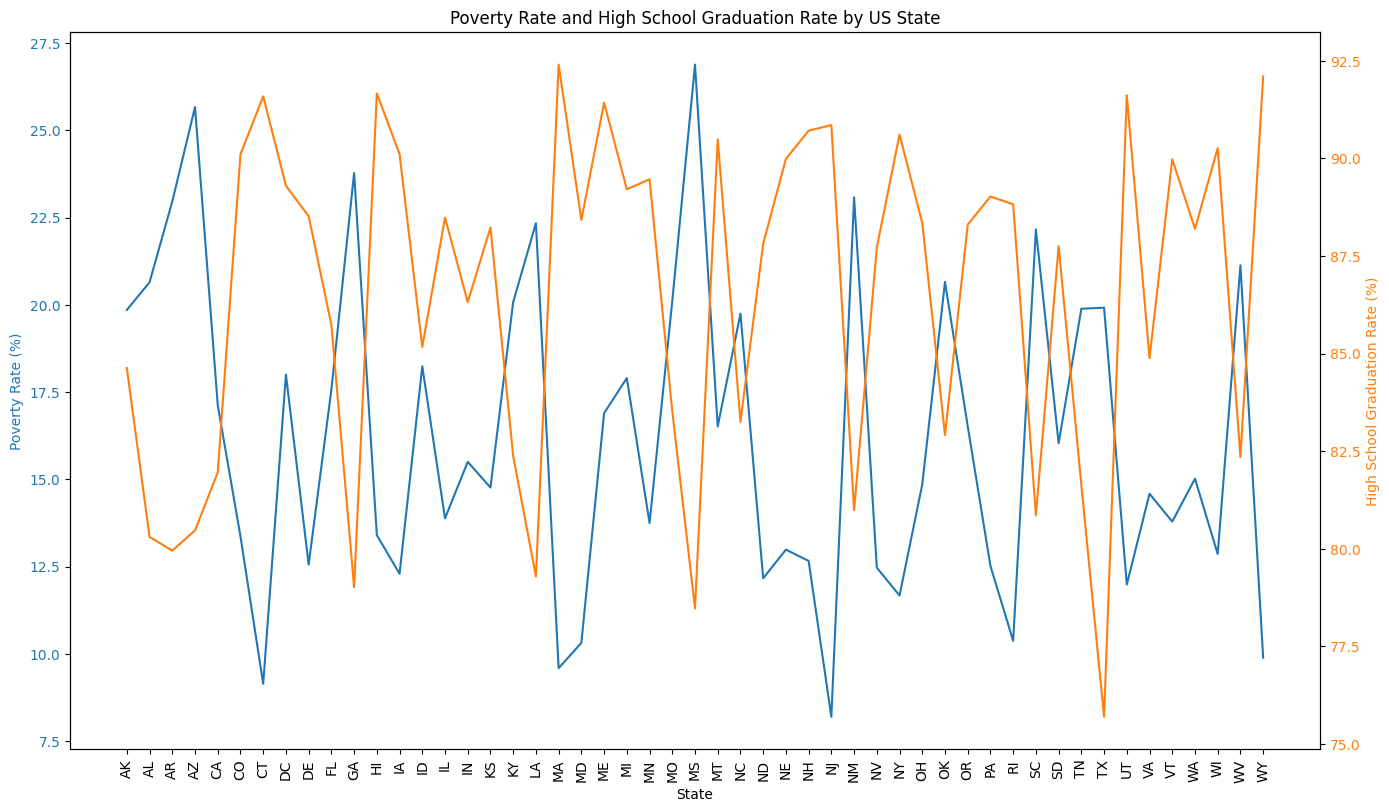

In [15]:
# Plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot poverty rate
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate (%)', color='tab:blue')
ax1.plot(
    df_poverty_hs_by_state['Geographic Area'],
    df_poverty_hs_by_state['poverty_rate'],
    color='tab:blue',
    label='Poverty Rate',
)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(df_poverty_hs_by_state['Geographic Area'], rotation=90)

# Create second y-axis for high school graduation rate
ax2 = ax1.twinx()
ax2.set_ylabel('High School Graduation Rate (%)', color='tab:orange')
ax2.plot(
    df_poverty_hs_by_state['Geographic Area'],
    df_poverty_hs_by_state['percent_completed_hs'],
    color='tab:orange',
    label='High School Graduation Rate',
)
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Add title and show plot
fig.tight_layout()
plt.title('Poverty Rate and High School Graduation Rate by US State')
plt.show()

### Line Chart: Poverty Rate and High School Graduation Rate by US State

The chart above shows the relationship between poverty rates and high school graduation rates across US states. The left y-axis represents the poverty rate, and the right y-axis represents the high school graduation rate.

This visualization helps to see if there is a correlation between higher poverty rates and lower high school graduation rates, or vice versa.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 1000x800 with 0 Axes>

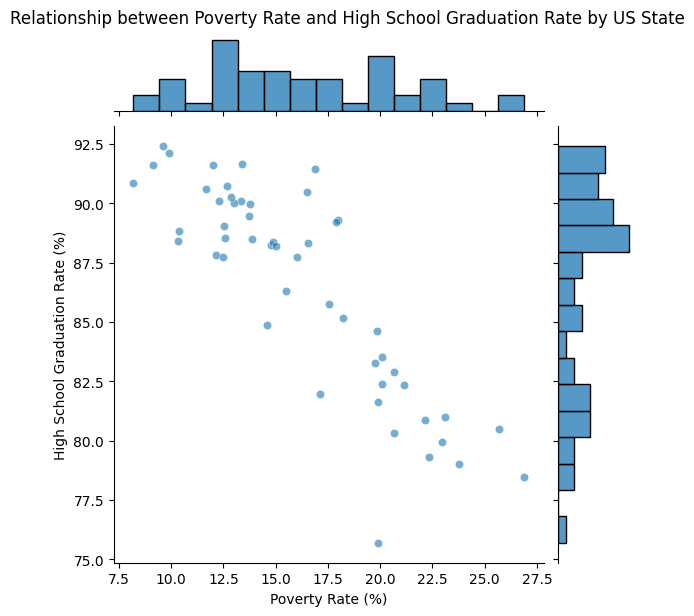

In [16]:
plt.figure(figsize=(10, 8))
sns.jointplot(
    x='poverty_rate',
    y='percent_completed_hs',
    data=df_poverty_hs_by_state,
    kind='scatter',
    marginal_kws=dict(bins=15, fill=True),
    joint_kws=dict(alpha=0.6),
)

plt.suptitle(
    'Relationship between Poverty Rate and High School Graduation Rate by US State',
    y=1.02,
)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.show()

### Seaborn Joint Plot: Relationship between Poverty Rate and High School Graduation Rate

The scatter plot above visualizes the relationship between poverty rates and high school graduation rates across US states, with kernel density estimates (KDE) for both axes. This plot provides a clear view of any potential correlations or trends.

From this visualization, you can see how these two variables interact and whether there are noticeable patterns or clusters.

<Figure size 1000x800 with 0 Axes>

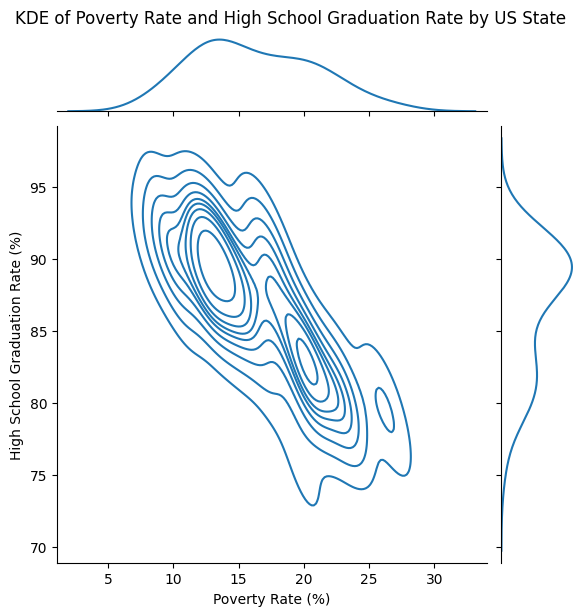

In [17]:
# Use Seaborn jointplot with KDE to visualize the relationship between poverty rate and high school graduation rate
plt.figure(figsize=(10, 8))
sns.jointplot(
    x='poverty_rate', y='percent_completed_hs', data=df_poverty_hs_by_state, kind='kde'
)

plt.suptitle('KDE of Poverty Rate and High School Graduation Rate by US State', y=1.02)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.show()

### Seaborn Joint Plot with KDE: Relationship between Poverty Rate and High School Graduation Rate

The kernel density estimate (KDE) plot above visualizes the relationship between poverty rates and high school graduation rates across US states. This plot highlights the density of data points, providing insight into the areas with higher concentrations of observations.

This visualization allows you to see how the distributions of poverty rates and high school graduation rates overlap and interact.

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

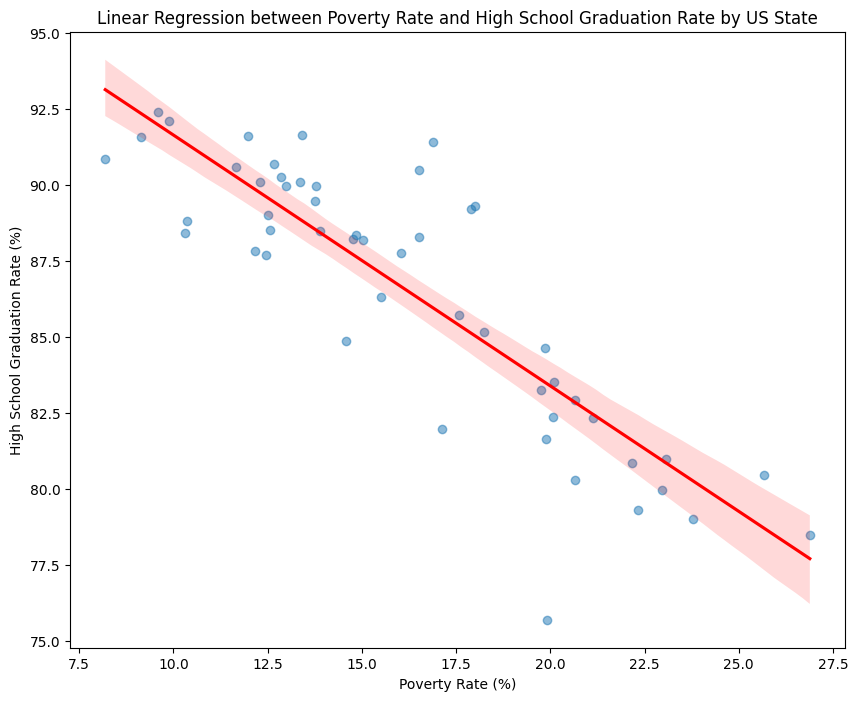

In [18]:
plt.figure(figsize=(10, 8))
sns.regplot(
    x='poverty_rate',
    y='percent_completed_hs',
    data=df_poverty_hs_by_state,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
)

plt.title(
    'Linear Regression between Poverty Rate and High School Graduation Rate by US State'
)
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.show()

### Linear Regression: Poverty Rate vs. High School Graduation Rate

The linear regression plot above shows the relationship between poverty rates and high school graduation rates across US states. The scatter points represent individual states, while the red line indicates the linear regression trend.

This visualization helps to identify whether there is a negative or positive correlation between the two variables.

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [19]:
# Convert racial share columns to numeric, coercing errors
df_share_race_city[['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']] = df_share_race_city[['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']].apply(pd.to_numeric, errors='coerce')

# Group by Geographic Area to find the average racial shares per state
df_race_by_state = df_share_race_city.groupby('Geographic area')[['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']].mean().reset_index()

# Melt the dataframe for easier plotting
df_race_by_state_melted = df_race_by_state.melt(id_vars='Geographic area', var_name='Race', value_name='Share')
df_race_by_state_melted

,Geographic area,Race,Share
0,AK,share_white,45.65
1,AL,share_white,72.51
2,AR,share_white,78.45
3,AZ,share_white,59.93
4,CA,share_white,71.87
...,...,...,...
250,VT,share_native_american,0.37
251,WA,share_native_american,3.75
252,WI,share_native_american,2.62
253,WV,share_native_american,0.20


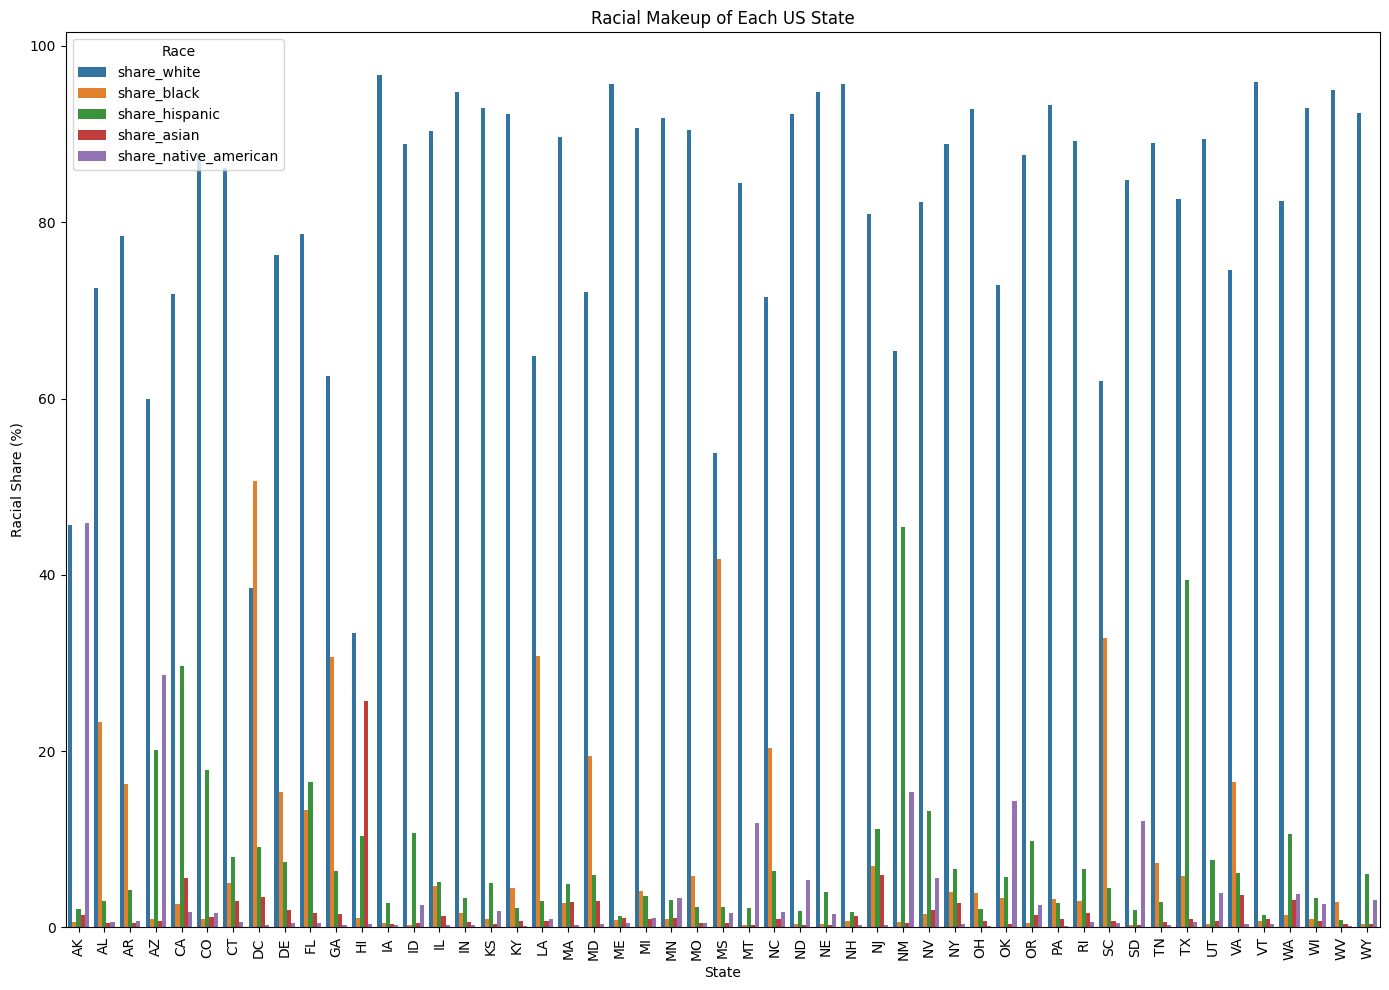

In [20]:
# Plot
plt.figure(figsize=(14, 10))
sns.barplot(x='Geographic area', y='Share', hue='Race', data=df_race_by_state_melted, palette='tab10')

plt.title('Racial Makeup of Each US State')
plt.xlabel('State')
plt.ylabel('Racial Share (%)')
plt.xticks(rotation=90)
plt.legend(title='Race')
plt.tight_layout()

plt.show()

### Bar Chart: Racial Makeup of Each US State

The bar chart above shows the racial makeup of each US state, visualized through subsections for white, black, Hispanic, Asian, and Native American populations. Each bar represents a state, and the colors within the bars indicate the proportion of each racial group.

This visualization provides a clear picture of the racial diversity across different states.

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [21]:
# Calculate the counts of people killed by race
race_counts = df_fatalities['race'].value_counts()
race_counts

race
W          1201
B           618
H           423
Unknown     195
A            39
N            31
O            28
Name: count, dtype: int64

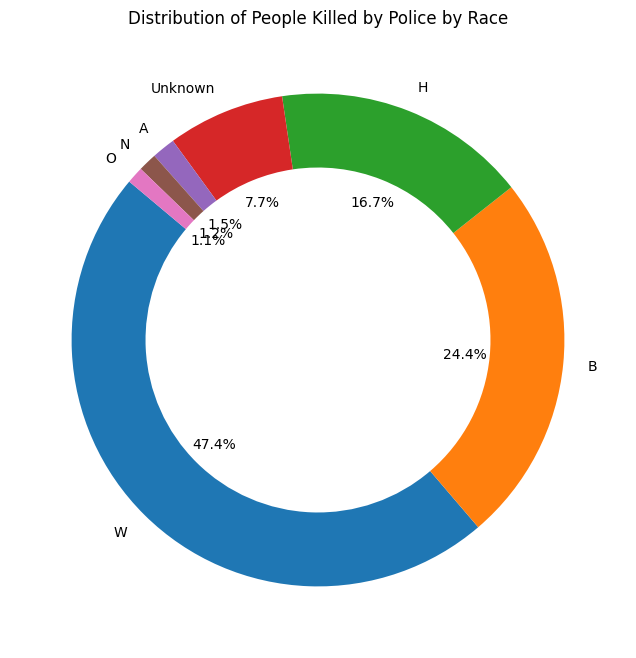

In [22]:
# Plot
plt.figure(figsize=(10, 8))
plt.pie(
    race_counts,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3),
)
plt.title('Distribution of People Killed by Police by Race')
plt.show()

### Donut Chart: Distribution of People Killed by Police by Race

The donut chart above displays the distribution of people killed by police in the US by race. The percentages indicate the proportion of each racial group among the total fatalities.

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [23]:
# Calculate the counts of people killed by gender
gender_counts = df_fatalities['gender'].value_counts()
gender_counts

gender
M    2428
F     107
Name: count, dtype: int64

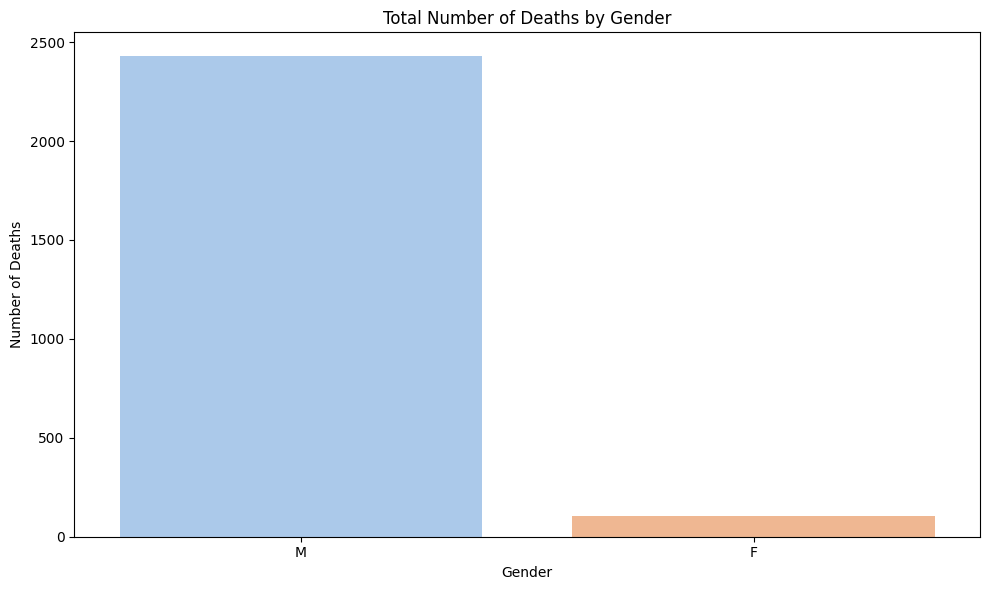

In [24]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values,
    palette='pastel',
    hue=gender_counts.index,
    legend=False,
)
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.tight_layout()

plt.show()

### Bar Chart: Total Number of Deaths by Gender

The bar chart above compares the total number of deaths between men and women caused by police. It clearly illustrates that significantly more men are killed compared to women.

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [25]:
# Filter out rows with missing age values
df_fatalities_filtered = df_fatalities[df_fatalities['age'] > 0]
df_fatalities_filtered

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,2819,Brian J. Skinner,28/07/17,shot,knife,32.00,M,Unknown,Glenville,NY,True,other,Not fleeing,False
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,Unknown,Kansas City,MO,False,attack,Not fleeing,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,Unknown,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


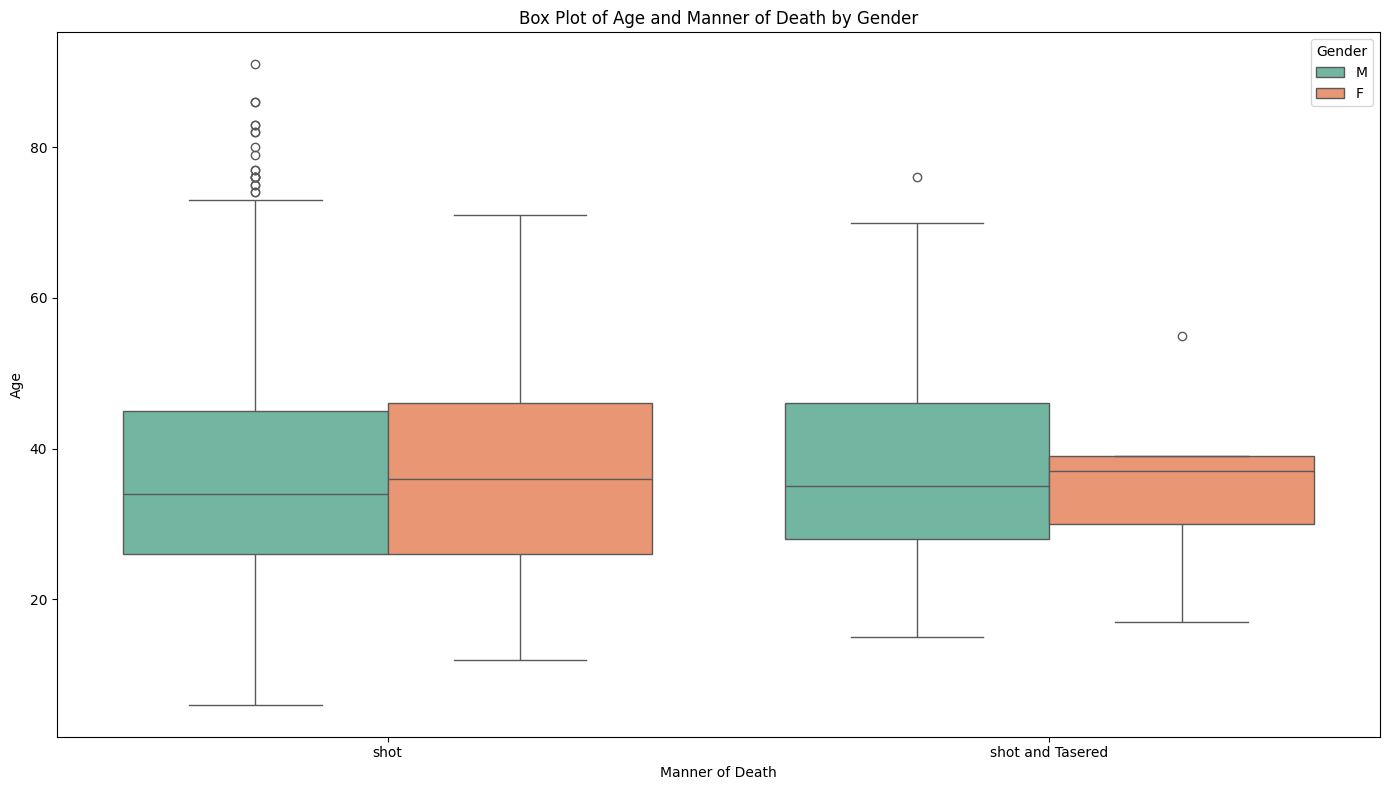

In [26]:
# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_fatalities_filtered, palette='Set2')
plt.title('Box Plot of Age and Manner of Death by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.tight_layout()

plt.show()

### Box Plot: Age and Manner of Death by Gender

The box plot above shows the distribution of ages for different manners of death, broken down by gender. This visualization helps identify any differences between men and women in terms of the manner of death and age distribution.

From the plot, we can observe the spread and central tendency of ages for each manner of death, as well as any potential differences between genders.

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [27]:
# Calculate the counts of armed status
armed_counts = df_fatalities['armed'].value_counts()
armed_counts

armed
gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: count, Length: 69, dtype: int64

In [28]:
# Calculate percentage of armed and unarmed individuals
armed_percentage = (df_fatalities['armed'] != 'unarmed').mean() * 100
armed_percentage

93.25443786982248

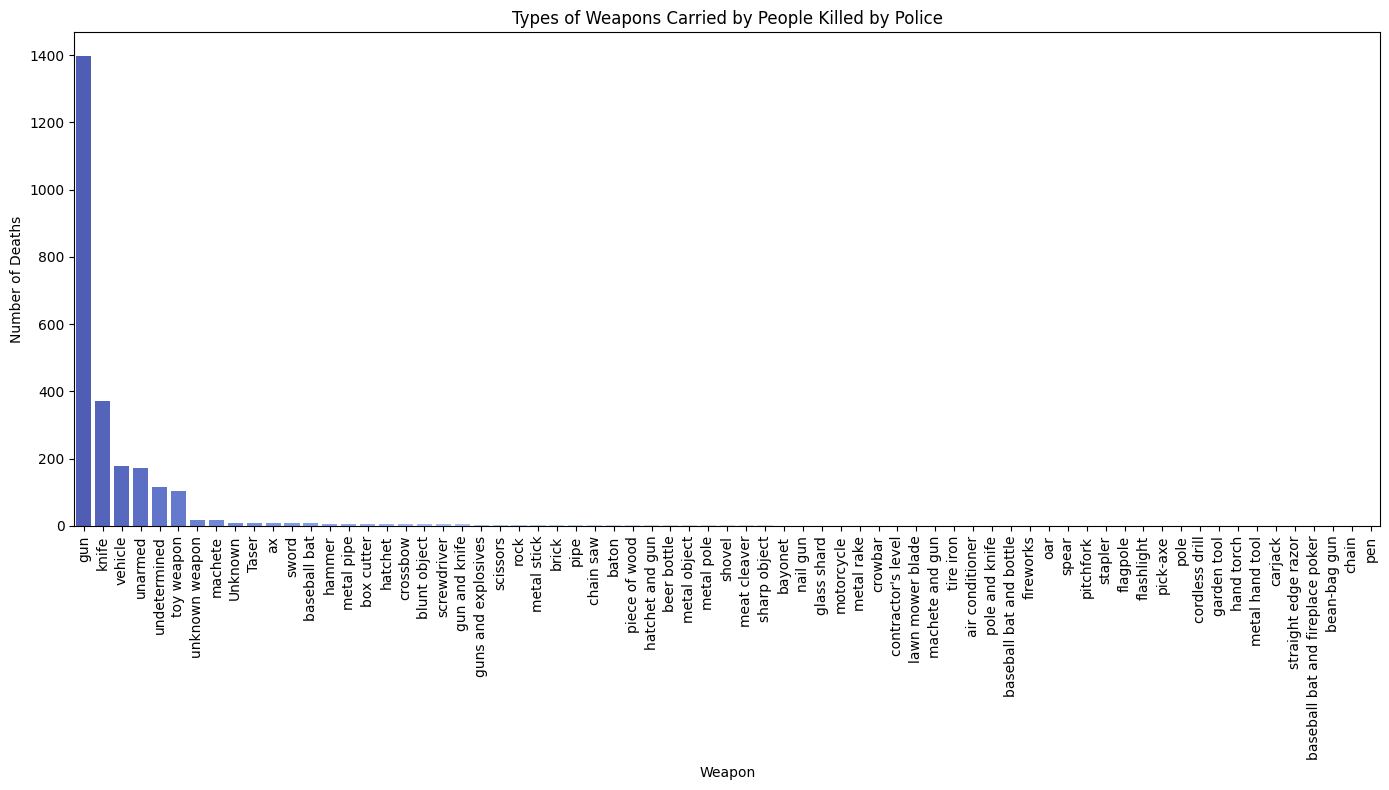

In [29]:
# Plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x=armed_counts.index,
    y=armed_counts.values,
    palette='coolwarm',
    hue=armed_counts.index,
    legend=False,
)
plt.title('Types of Weapons Carried by People Killed by Police')
plt.xlabel('Weapon')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

The bar chart above shows the types of weapons (if any) carried by individuals killed by police.

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [30]:
# Calculate the ages of people killed
age_counts = df_fatalities_filtered['age'].value_counts().sort_index()
age_counts

age
6.00     1
12.00    1
13.00    1
14.00    1
15.00    8
        ..
80.00    1
82.00    2
83.00    2
86.00    2
91.00    1
Name: count, Length: 73, dtype: int64

In [31]:
# Calculate percentage of people killed who were under 25 years old
under_25_percentage = (df_fatalities_filtered['age'] < 25).mean() * 100
under_25_percentage

18.307567127746136

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

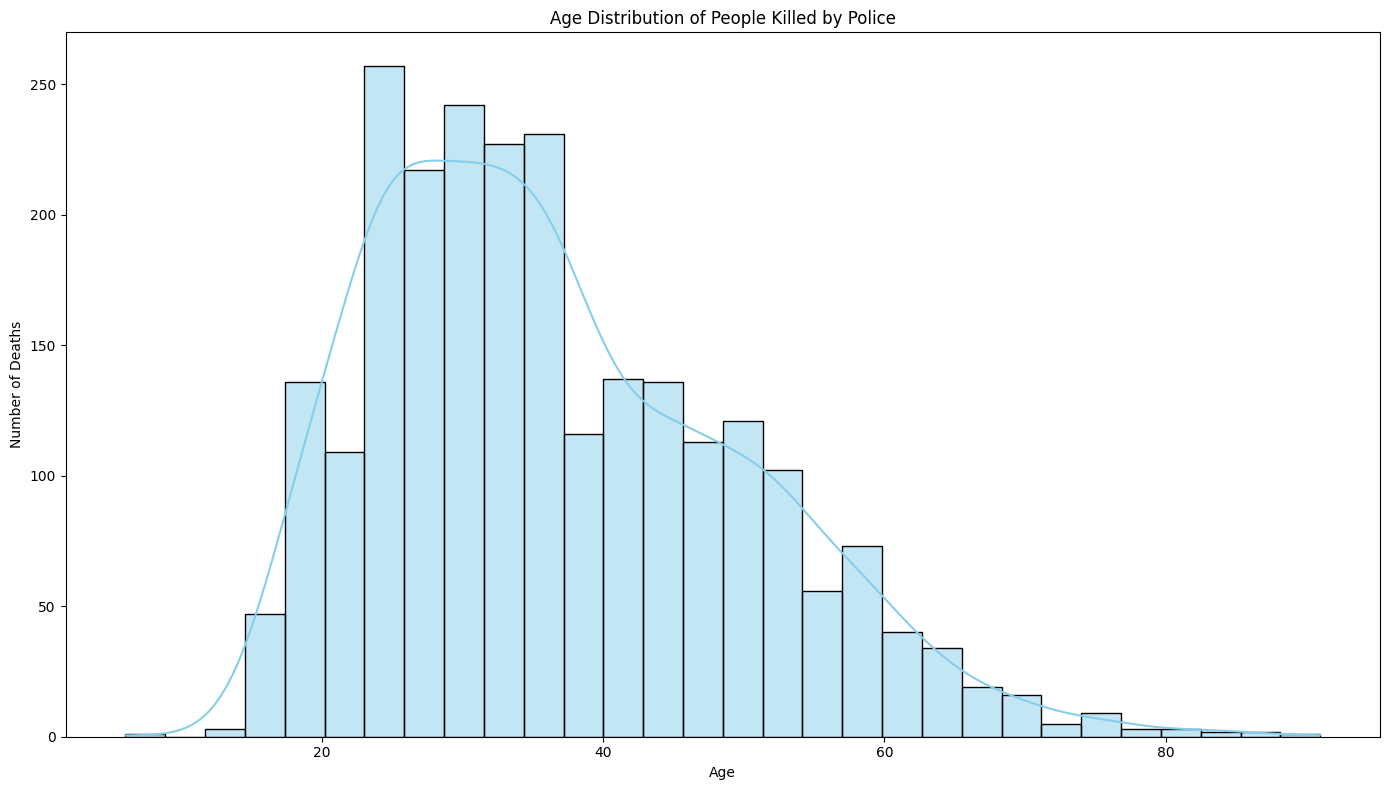

In [32]:
# Plot age distribution
plt.figure(figsize=(14, 8))
sns.histplot(df_fatalities_filtered['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of People Killed by Police')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.tight_layout()

plt.show()

The histogram above shows the age distribution of people killed by police, with a kernel density estimate (KDE) overlay to indicate the density of ages.

- **Percentage of people killed who were under 25 years old:** 18.31%

This means that a significant portion of those killed by police were relatively young.

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [33]:
# Filter out rows with valid age and race values
df_fatalities_filtered_race = df_fatalities_filtered[df_fatalities_filtered['race'] != 'Unknown']
df_fatalities_filtered_race

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.00,M,B,Marion,AR,False,undetermined,Not fleeing,False
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.00,M,B,Dayton,OH,False,attack,Car,False
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.00,M,B,Homer,LA,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


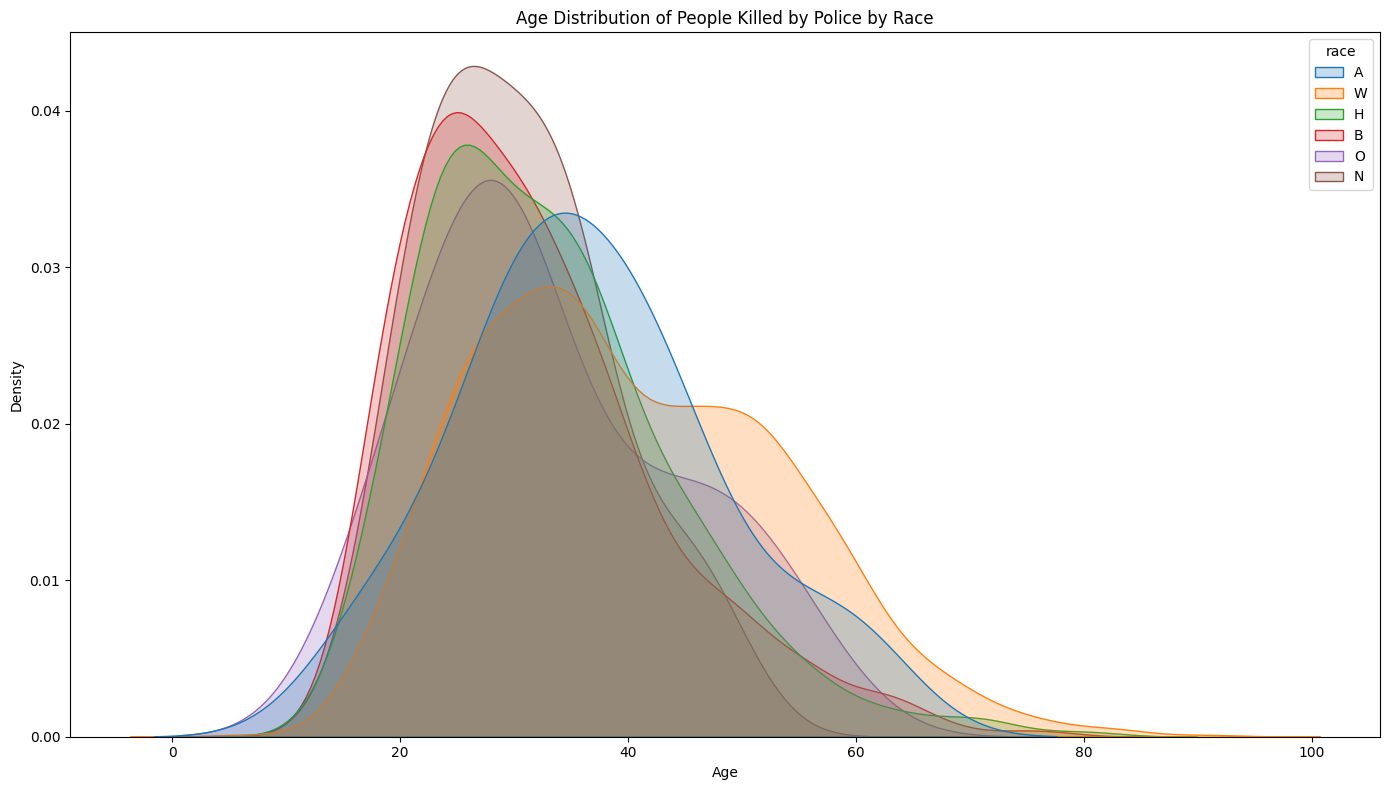

In [34]:
# Plot KDE for each race
plt.figure(figsize=(14, 8))
sns.kdeplot(
    data=df_fatalities_filtered_race,
    x='age',
    hue='race',
    fill=True,
    common_norm=False,
    palette='tab10',
)
plt.title('Age Distribution of People Killed by Police by Race')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [35]:
# Calculate the counts of people killed by race
race_counts = df_fatalities['race'].value_counts()
race_counts

race
W          1201
B           618
H           423
Unknown     195
A            39
N            31
O            28
Name: count, dtype: int64

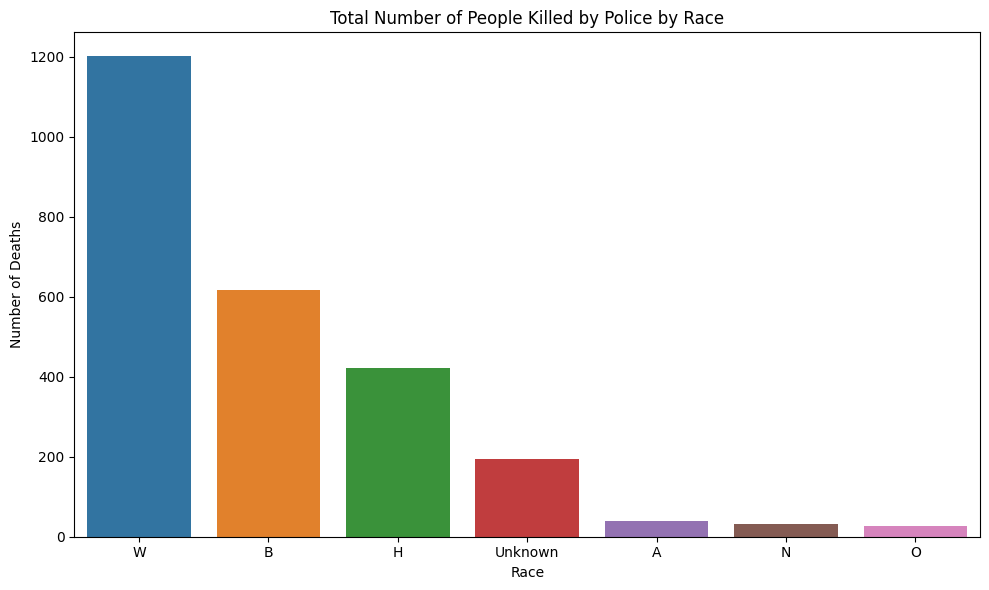

In [36]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=race_counts.index,
    y=race_counts.values,
    palette='tab10',
    hue=race_counts.index,
    legend=False,
)
plt.title('Total Number of People Killed by Police by Race')
plt.xlabel('Race')
plt.ylabel('Number of Deaths')
plt.tight_layout()

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [37]:
# Calculate the percentage of people killed by police who have been diagnosed with a mental illness
mental_illness_percentage = (df_fatalities['signs_of_mental_illness'].mean()) * 100

mental_illness_percentage

24.970414201183434

Approximately **24.97%** of people killed by police have been diagnosed with a mental illness.

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [38]:
# Calculate the counts of people killed by city
city_counts = df_fatalities['city'].value_counts().head(10)
city_counts

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64

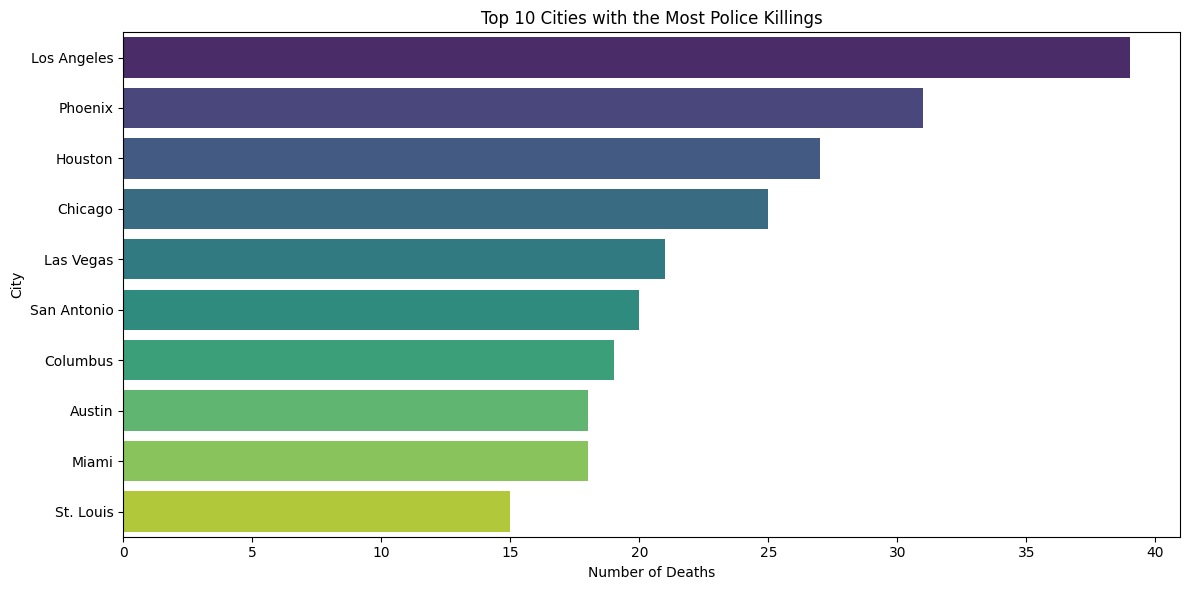

In [39]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=city_counts.values,
    y=city_counts.index,
    palette='viridis',
    hue=city_counts.index,
    legend=False,
)
plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('Number of Deaths')
plt.ylabel('City')
plt.tight_layout()

plt.show()

The bar chart above ranks the top 10 cities with the most police killings. The cities with the highest number of fatalities are:

1. **Los Angeles:** 39
2. **Phoenix:** 31
3. **Houston:** 27
4. **Chicago:** 25
5. **Las Vegas:** 21
6. **San Antonio:** 20
7. **Columbus:** 19
8. **Austin:** 18
9. **Miami:** 18
10. **St. Louis:** 15

These cities have the highest numbers of police-related fatalities.

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [40]:
# Find the top 10 cities with the highest number of police killings
top_10_cities = df_fatalities['city'].value_counts().head(10)
top_10_cities

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Austin         18
Miami          18
St. Louis      15
Name: count, dtype: int64

In [41]:
# Standardize city names for merging
df_share_race_city['City'] = df_share_race_city['City'].str.replace(' city', '')
df_share_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.20,30.20,0.00,0.00,1.60
1,AL,Abbeville,54.40,41.40,0.10,1.00,3.10
2,AL,Adamsville,52.30,44.90,0.50,0.30,2.30
3,AL,Addison town,99.10,0.10,0.00,0.10,0.40
4,AL,Akron town,13.20,86.50,0.00,0.00,0.30
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm CDP,95.90,0.00,0.00,2.10,0.00
29264,WY,Worland,89.90,0.30,1.30,0.60,16.60
29265,WY,Wright town,94.50,0.10,1.40,0.20,6.20
29266,WY,Yoder town,97.40,0.00,0.00,0.00,4.00


In [42]:
# Filter the dataframes for the top 10 cities
df_top_10_fatalities = df_fatalities[df_fatalities['city'].isin(top_10_cities.index)]
df_top_10_share_race = df_share_race_city[
    df_share_race_city['City'].isin(top_10_cities.index)
]

In [43]:
df_top_10_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.00,M,B,Columbus,OH,True,other,Not fleeing,False
40,75,Pablo Meza,17/01/15,shot,gun,24.00,M,H,Los Angeles,CA,False,attack,Not fleeing,False
48,90,Isaac Holmes,21/01/15,shot,gun,19.00,M,B,St. Louis,MO,False,attack,Not fleeing,False
52,336,Robert Francis Mesch,23/01/15,shot,gun,61.00,M,W,Austin,TX,True,attack,Not fleeing,False
64,348,Nicolas Leland Tewa,27/01/15,shot,vehicle,26.00,M,N,Phoenix,AZ,False,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2793,Isaiah Perkins,20/07/17,shot,gun,27.00,M,B,St. Louis,MO,False,attack,Car,False
2515,2798,Jerrod Kershaw,24/07/17,shot,gun,31.00,M,W,St. Louis,MO,True,attack,Car,False
2520,2804,TK TK,26/07/17,shot,gun,35.00,M,Unknown,Phoenix,AZ,False,attack,Other,False
2521,2806,TK TK,26/07/17,shot,gun,0.00,M,Unknown,San Antonio,TX,False,attack,Not fleeing,False


In [44]:
df_top_10_share_race

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
712,AK,Houston,82.20,0.40,6.70,0.60,3.30
1201,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80
1404,AR,Austin,94.20,2.00,0.30,0.40,4.30
2714,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50
4633,FL,Miami,72.60,19.20,0.30,1.00,70.00
4847,FL,San Antonio,96.50,1.10,0.00,0.40,6.10
5173,GA,Columbus,46.30,45.50,0.40,2.20,6.40
6278,IL,Chicago,45.00,32.90,0.50,5.50,28.90
7442,IN,Austin,97.10,0.30,0.30,0.20,2.10
7533,IN,Columbus,86.90,2.70,0.20,5.60,5.80


In [45]:
# Summarize the number of killings by race in the top 10 cities
killings_by_race = df_top_10_fatalities.groupby(['city', 'race']).size().unstack(fill_value=0)
killings_by_race

race,A,B,H,N,O,Unknown,W
city,,,,,,,
Austin,0,3,2,0,0,0,13
Chicago,0,21,1,0,0,1,2
Columbus,0,11,0,0,1,1,6
Houston,1,15,6,1,0,1,3
Las Vegas,0,3,5,0,0,4,9
Los Angeles,1,10,19,0,0,3,6
Miami,0,8,6,0,0,1,3
Phoenix,0,2,11,3,0,3,12
San Antonio,0,3,12,0,0,2,3


In [46]:
# Merge with race share data
merged_data = pd.merge(df_top_10_share_race, killings_by_race, left_on='City', right_index=True, how='left').fillna(0)
merged_data

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,A,B,H,N,O,Unknown,W
712,AK,Houston,82.20,0.40,6.70,0.60,3.30,1,15,6,1,0,1,3
1201,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80,0,2,11,3,0,3,12
1404,AR,Austin,94.20,2.00,0.30,0.40,4.30,0,3,2,0,0,0,13
2714,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50,1,10,19,0,0,3,6
4633,FL,Miami,72.60,19.20,0.30,1.00,70.00,0,8,6,0,0,1,3
4847,FL,San Antonio,96.50,1.10,0.00,0.40,6.10,0,3,12,0,0,2,3
5173,GA,Columbus,46.30,45.50,0.40,2.20,6.40,0,11,0,0,1,1,6
6278,IL,Chicago,45.00,32.90,0.50,5.50,28.90,0,21,1,0,0,1,2
7442,IN,Austin,97.10,0.30,0.30,0.20,2.10,0,3,2,0,0,0,13
7533,IN,Columbus,86.90,2.70,0.20,5.60,5.80,0,11,0,0,1,1,6


In [47]:
# Calculate the rate of death by race
race_columns = ['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
race_mapping = {
    'share_white': 'W',
    'share_black': 'B',
    'share_native_american': 'N',
    'share_asian': 'A',
    'share_hispanic': 'H'
}

for share_col, race in race_mapping.items():
    merged_data[f'rate_{race}'] = merged_data[race] / merged_data[share_col]

merged_data

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,A,B,H,N,O,Unknown,W,rate_W,rate_B,rate_N,rate_A,rate_H
712,AK,Houston,82.20,0.40,6.70,0.60,3.30,1,15,6,1,0,1,3,0.04,37.50,0.15,1.67,1.82
1201,AZ,Phoenix,65.90,6.50,2.20,3.20,40.80,0,2,11,3,0,3,12,0.18,0.31,1.36,0.00,0.27
1404,AR,Austin,94.20,2.00,0.30,0.40,4.30,0,3,2,0,0,0,13,0.14,1.50,0.00,0.00,0.47
2714,CA,Los Angeles,49.80,9.60,0.70,11.30,48.50,1,10,19,0,0,3,6,0.12,1.04,0.00,0.09,0.39
4633,FL,Miami,72.60,19.20,0.30,1.00,70.00,0,8,6,0,0,1,3,0.04,0.42,0.00,0.00,0.09
4847,FL,San Antonio,96.50,1.10,0.00,0.40,6.10,0,3,12,0,0,2,3,0.03,2.73,NaN,0.00,1.97
5173,GA,Columbus,46.30,45.50,0.40,2.20,6.40,0,11,0,0,1,1,6,0.13,0.24,0.00,0.00,0.00
6278,IL,Chicago,45.00,32.90,0.50,5.50,28.90,0,21,1,0,0,1,2,0.04,0.64,0.00,0.00,0.03
7442,IN,Austin,97.10,0.30,0.30,0.20,2.10,0,3,2,0,0,0,13,0.13,10.00,0.00,0.00,0.95
7533,IN,Columbus,86.90,2.70,0.20,5.60,5.80,0,11,0,0,1,1,6,0.07,4.07,0.00,0.00,0.00


In [48]:
merged_data[['City'] + [f'rate_{race}' for race in race_mapping.values()]]

,City,rate_W,rate_B,rate_N,rate_A,rate_H
712,Houston,0.04,37.50,0.15,1.67,1.82
1201,Phoenix,0.18,0.31,1.36,0.00,0.27
1404,Austin,0.14,1.50,0.00,0.00,0.47
2714,Los Angeles,0.12,1.04,0.00,0.09,0.39
4633,Miami,0.04,0.42,0.00,0.00,0.09
4847,San Antonio,0.03,2.73,NaN,0.00,1.97
5173,Columbus,0.13,0.24,0.00,0.00,0.00
6278,Chicago,0.04,0.64,0.00,0.00,0.03
7442,Austin,0.13,10.00,0.00,0.00,0.95
7533,Columbus,0.07,4.07,0.00,0.00,0.00


c:\Users\brian\code\data_science_projects\FatalForceAnalysis\.venv\Lib\site-packages\matplotlib\transforms.py:2049: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
c:\Users\brian\code\data_science_projects\FatalForceAnalysis\.venv\Lib\site-packages\matplotlib\transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


<Figure size 1400x800 with 0 Axes>

c:\Users\brian\code\data_science_projects\FatalForceAnalysis\.venv\Lib\site-packages\matplotlib\transforms.py:2049: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty
c:\Users\brian\code\data_science_projects\FatalForceAnalysis\.venv\Lib\site-packages\matplotlib\transforms.py:372: RuntimeWarning: invalid value encountered in scalar subtract
  return (x0, y0, x1 - x0, y1 - y0)


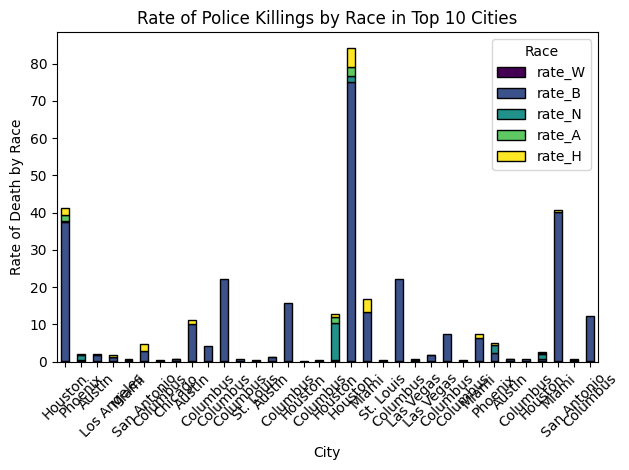

In [49]:
# Filter and prepare data for plotting
race_rates_columns = [f'rate_{race}' for race in race_mapping.values()]
plot_data = merged_data[['City'] + race_rates_columns].set_index('City')

# Create a bar plot for the rates of death by race in the top 10 cities
plt.figure(figsize=(14, 8))
plot_data.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.title('Rate of Police Killings by Race in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Rate of Death by Race')
plt.legend(title='Race')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [50]:
# Summarize the number of killings by state
killings_by_state = df_fatalities['state'].value_counts().reset_index()
killings_by_state.columns = ['state', 'killings']
killings_by_state

,state,killings
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [51]:
# Create a choropleth map
fig = px.choropleth(
    killings_by_state,
    locations='state',
    locationmode='USA-states',
    color='killings',
    color_continuous_scale='Reds',
    scope='usa',
    labels={'killings': 'Number of Killings'},
    title='Police Killings by US State',
)
fig.update_layout(geo=dict(bgcolor='rgba(0,0,0,0)'))

fig.show()

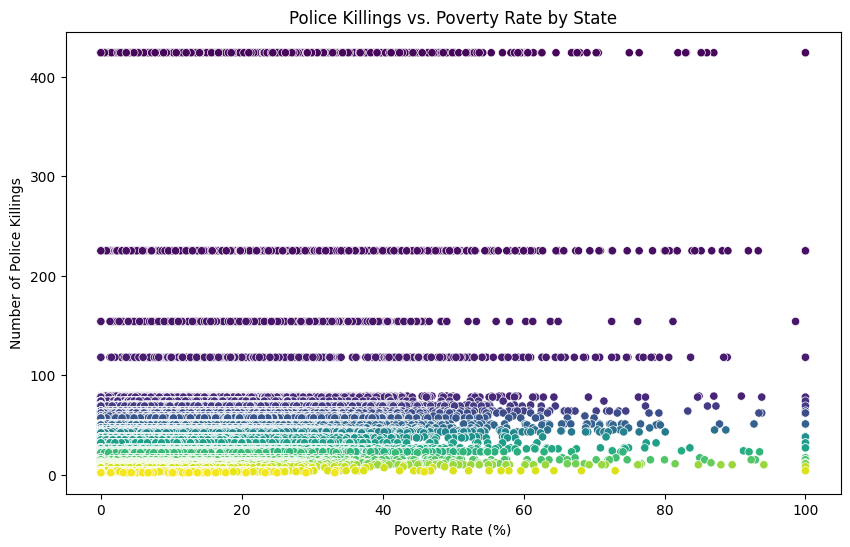

In [52]:
# Load the poverty rate data and merge with the killings data
df_pct_poverty['Geographic Area'] = df_pct_poverty['Geographic Area'].str.upper()
df_pct_poverty = df_pct_poverty.rename(
    columns={"Geographic Area": "state_name", "poverty_rate": "poverty_rate"}
)
merged_data_poverty = pd.merge(
    killings_by_state, df_pct_poverty, left_on='state', right_on='state_name'
)

# Plot a scatter plot to visualize the relationship between poverty rate and police killings
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data_poverty,
    x='poverty_rate',
    y='killings',
    hue='state',
    palette='viridis',
    legend=None,
)
plt.title('Police Killings vs. Poverty Rate by State')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('Number of Police Killings')
plt.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [57]:
# Convert the 'date' column to datetime format
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])

# Extract the year from the 'date' column
df_fatalities['year'] = df_fatalities['date'].dt.year

# Summarize the number of killings by year
killings_by_year = df_fatalities['year'].value_counts().sort_index().reset_index()
killings_by_year.columns = ['year', 'killings']
killings_by_year

,year,killings
0,2015,991
1,2016,963
2,2017,581


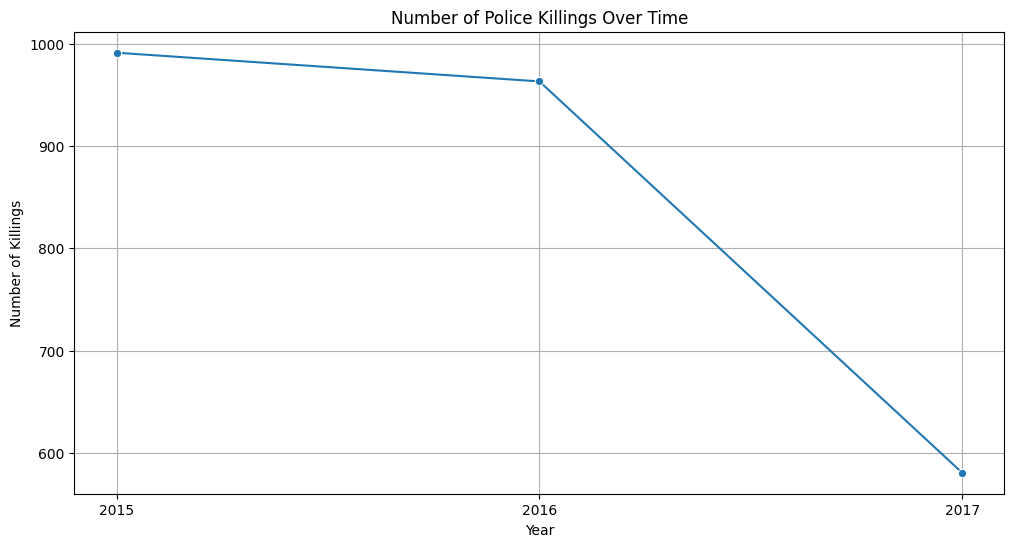

In [58]:
# Plot the number of police killings over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=killings_by_year, x='year', y='killings', marker='o')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Killings')
plt.xticks(killings_by_year['year'])
plt.grid(True)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).